## <center> **FDC105: Advanced Data Analytics in Economics and Business**
## <center> **Final Project**
## <center> **Group 2**
# <center> **Bank Customer Churn Prediction**
---

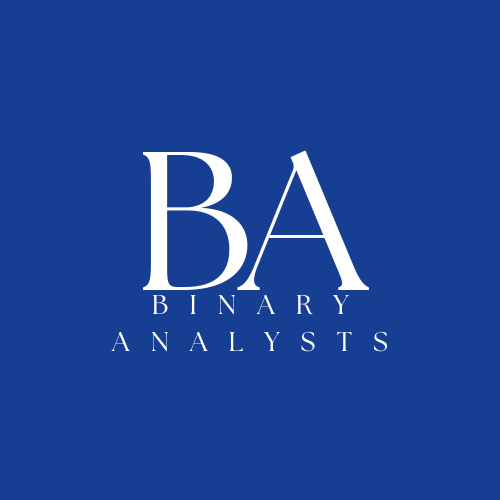

In [9]:
from IPython import display
display.Image(r"C:\Users\Phong Vu\Dropbox\PC\Downloads\BinaryAnalysts.png")

# **Abstract**
Bài phân tích này sử dụng dữ liệu sử dụng dịch vụ ngân hàng của khách hàng tại ngân hàng thương mại tại Việt Nam, từ tháng 9 năm 2020 đến tháng 6 năm 2021, để phân tích dữ liệu và xây dựng mô hình học máy dự đoán khả năng rời bỏ (hay không tiếp tục sử dụng dịch vụ) của khách hàng sau 6 tháng. 

Cụ thể, bài phân tích xây dựng chỉ số rời bỏ bằng dữ liệu được chia theo các giai đoạn, nhìn chung, giả định được đặt ra rằng nều khách hàng không còn sử dụng dịch vụ vào tháng 6 năm 2021 là khách hàng đã rời bỏ. 

Sau đó, phân tích dữ liệu cho thấy rằng: Nhóm tuổi ổn định (từ 30 đến 40 tuổi) có số lượng khách hàng rời bỏ ít hơn so với ở Nhóm tuổi chưa ổn định (từ 21 đến 30); Giá trị thanh toán trung bình của cả hai nhóm rời bỏ hay không đều có xu hướng tăng theo thời gian; Giao dịch chuyển khoản là giao dịch được thực hiện nhiều nhất trong tháng 3 và tháng 6 năm 2021; Lượng khách hàng nam lớn hơn gấp hai lần lượng khách hàng nữ; Chủ yếu khách hàng rời bỏ đều trong tình trạng độc thân.

Cuối cùng, xây dựng mô hình, bốn mô hình được lựa chọn, bao gồm: **Logistic Regression**, **SVC**, **Decision Tree Classifier** và **Random Forest Classifier**. Chỉ số **Recall Score** được lựa chọn để đánh giá và lựa chọn mô hình. Kết quả cho thấy mô hình **Decision Tree Classifier** có hiệu năng tốt nhất vì có chỉ số Recall Score cao nhất trong bốn mô hình. Sau đó, tìm siêu tham số cho mô hình này cho kết quả Accuracy cao hơn mô hình ban đầu là 0.03%. Tuy nhiên, Recall Score tốt nhất đạt được lên tới 91%, với Precision Score đạt 59% khi lưa chọn Threshold Index là 3.

# **Data Summary**

Bộ dữ liệu được lấy từ cơ sở dữ liệu thực tế của một ngân hàng thương mại tại Việt Nam, và nó chứa thông tin về lịch sử thanh toán, giao dịch, yếu tố nhân khẩu học và sở thích của khách hàng. Cụ thể:
- 'local_ref_1': Giới tính của khách hàng
- 'vn_marital_status': Tình trạng hôn nhân của khách hàng
- 'resid_province': Tình thành sinh sống của khách hàng
- 'resid_district': Quận/huyện sinh sống của khách hàng
- 'resid_wards': Phường/Xã sinh sống của khách hàng
- 'birth_incorp_date': Ngày sinh của khách hàng
- 'amount_week': Tổng số tiền giao dịch của khách hàng trong 1 tuần trước đó
- 'max_amount_week': Số tiền giao dịch lớn nhất của khách hàng trong 1 tuần trước đó
- 'min_amount_week': Số tiền giao dịch bé nhất của khách hàng trong 1 tuần trước đó
- 'distinct_payment_code_week': Loại dịch vụ khách hàng sử dụng trong 1 tuần trước đó
- 'count_payment_code_week': Số lượng dịch vụ khách hàng sử dụng trong 1 tuần trước đó
- 'distinct_trans_group_week': Nhóm giao dịch khách hàng sử dụng trong 1 tuần trước đó
- 'distinct_ref_no_week': Số lượng người nhận/đối tác của các giao dịch trong 1 tuần trước đó
- 'amount_month': Tổng số tiền giao dịch của khách hàng trong 1 tháng trước đó
- 'max_amount_month': Số tiền giao dịch lớn nhất của khách hàng trong 1 tháng trước đó
- 'min_amount_month': Số tiền giao dịch bé nhất của khách hàng trong 1 tháng trước đó
- 'distinct_payment_code_month': Loại dịch vụ khách hàng sử dụng trong 1 tháng trước đó
- 'count_payment_code_month': Số lượng dịch vụ khách hàng sử dụng trong 1 tháng trước đó
- 'distinct_trans_group_month': Nhóm giao dịch khách hàng sử dụng trong 1 tháng trước đó
- 'distinct_ref_no_month': Số lượng người nhận/đối tác của các giao dịch trong 1 tháng trước đó
- 'amount_3month': Tổng số tiền giao dịch của khách hàng trong 3 tháng trước đó
- 'max_amount_3month': Số tiền giao dịch lớn nhất của khách hàng trong 3 tháng trước đó
- 'min_amount_3month': Số tiền giao dịch bé nhất của khách hàng trong 3 tháng trước đó
- 'distinct_payment_code_3month': Loại dịch vụ khách hàng sử dụng trong 3 tháng trước đó
- 'count_payment_code_3month': Số lượng dịch vụ khách hàng sử dụng trong 3 tháng trước đó
- 'distinct_trans_group_3month': Nhóm giao dịch khách hàng sử dụng trong 3 tháng trước đó
- 'distinct_ref_no_3month': Số lượng người nhận của các giao dịch trong 1 tháng trước đó
- 'most_act_mar2021_count': Số lượng của loại giao dịch được thực hiện nhiều nhất trong tháng 3 năm 2021
- 'most_act_mar2021': Loại giao dịch khách hàng thực hiện nhiều nhất trong tháng 3 năm 2021
- 'total_act_mar2021': Tổng số tất cả giao dịch được thực hiện trong tháng 3 năm 2021
- 'total_amt_mar2021': Tổng giá trị tất cả giao dịch được thực hiện trong tháng 3 năm 2021
- 'most_act_juin2021_count': Số lượng của loại giao dịch được thực hiện nhiều nhất trong tháng 6 năm 2021
- 'most_act_juin2021': Loại giao dịch khách hàng thực hiện nhiều nhất trong tháng 6 năm 2021
- 'total_act_juin2021': Tổng số tất cả giao dịch được thực hiện trong tháng 6 năm 2021
- 'total_amt_juin2021': Tổng giá trị tất cả giao dịch được thực hiện trong tháng 6 năm 2021

In [73]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import scipy.stats as stats
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (GridSearchCV, KFold, RandomizedSearchCV,
                                     ShuffleSplit, StratifiedKFold,
                                     StratifiedShuffleSplit, cross_val_predict,
                                     cross_val_score, learning_curve,
                                     train_test_split)
from sklearn.metrics import (classification_report,accuracy_score, 
                             recall_score, precision_score, f1_score, 
                             roc_auc_score, confusion_matrix, roc_curve, auc)
from sklearn.svm import SVC

In [10]:
df = pd.read_csv(r'C:\Users\Phong Vu\Dropbox\PC\Downloads\FDC - Data Science in Economics and Business\FDC105 - Advanced Data Analytics in Economics and Business\Final Group Project\dataset.csv')
df.head()

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,distinct_payment_code_month,count_payment_code_month,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,most_act_mar2021_count,most_act_mar2021,total_act_mar2021,total_amt_mar2021,most_act_juin2021_count,most_act_juin2021,total_act_juin2021,total_amt_juin2021,rd_id,savingValueMar2021_heoSo,savingValueJuin2021_heoSo,totalLoginMar2021_heoSo,totalLoginJuin2021_heoSo,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021
0,MALE,Married,27.0,262.0,9436.0,1992.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.000056,0.000204,0.000008,0.0,0.0,2.0,12.0,0.000073,0.000400,5.920000e-06,0,0,2,33,5.0,Giao dich chuyen khoan,5.0,0.000016,14.0,Giao dich chuyen khoan,17.0,0.006543,1542621943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000019,0.000140,0.000203,0.0,0.0,1.0,1.0,0.000014,0.000068,1.103180e-04,0,0,2,5,NaN,NaN,NaN,NaN,1.0,Giao dich thanh toan,1.0,0.000062,1570544787,NaN,NaN,NaN,NaN,NaN,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0
2,MALE,Married,1.0,250.0,8989.0,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000030,0.000122,0.000143,0.0,0.0,1.0,2.0,0.000016,0.000060,2.100000e-05,2,3,2,7,4.0,Giao dich chuyen khoan,6.0,0.000046,1.0,Giao dich chuyen khoan,2.0,0.000071,636921018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MALE,Single,40.0,431.0,18055.0,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,642516181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MALE,Married,49.0,512.0,20758.0,1989.0,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,0.000097,0.000247,0.000001,1.0,5.0,3.0,12.0,0.000074,0.000380,5.920000e-07,1,11,3,24,9.0,Giao dich chuyen khoan,10.0,0.000170,17.0,Giao dich chuyen khoan,19.0,0.000575,1308443119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Drop unwanted columns (Heo So columns)
df.drop(['resid_province', 'resid_district', 'resid_wards',
        'savingValueMar2021_heoSo', 'savingValueJuin2021_heoSo', 
        'totalLoginMar2021_heoSo', 'totalLoginJuin2021_heoSo', 'totalSavings2021_heoSo',
        'balanceJuin2021', 'nominal_interestJuin2021', 'real_interestJuin2021', 
        'nhomno_xhtdJuin2021', 'categoryJuin2021', 'sub_productJuin2021', 
        'loaikyhanJuin2021', 'sectorJuin2021', 'product_codeJuin2021'], axis=1, inplace=True)
df.head()

,local_ref_1,vn_marital_status,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,distinct_payment_code_month,count_payment_code_month,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,most_act_mar2021_count,most_act_mar2021,total_act_mar2021,total_amt_mar2021,most_act_juin2021_count,most_act_juin2021,total_act_juin2021,total_amt_juin2021,rd_id
0,MALE,Married,1992.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.000056,0.000204,0.000008,0.0,0.0,2.0,12.0,0.000073,0.000400,5.920000e-06,0,0,2,33,5.0,Giao dich chuyen khoan,5.0,0.000016,14.0,Giao dich chuyen khoan,17.0,0.006543,1542621943
1,MALE,Single,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000019,0.000140,0.000203,0.0,0.0,1.0,1.0,0.000014,0.000068,1.103180e-04,0,0,2,5,NaN,NaN,NaN,NaN,1.0,Giao dich thanh toan,1.0,0.000062,1570544787
2,MALE,Married,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000030,0.000122,0.000143,0.0,0.0,1.0,2.0,0.000016,0.000060,2.100000e-05,2,3,2,7,4.0,Giao dich chuyen khoan,6.0,0.000046,1.0,Giao dich chuyen khoan,2.0,0.000071,636921018
3,MALE,Single,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,642516181
4,MALE,Married,1989.0,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,0.000097,0.000247,0.000001,1.0,5.0,3.0,12.0,0.000074,0.000380,5.920000e-07,1,11,3,24,9.0,Giao dich chuyen khoan,10.0,0.000170,17.0,Giao dich chuyen khoan,19.0,0.000575,1308443119


In [12]:
df.shape

(100000, 33)

In [13]:
df.describe()

,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,distinct_payment_code_month,count_payment_code_month,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,most_act_mar2021_count,total_act_mar2021,total_amt_mar2021,most_act_juin2021_count,total_act_juin2021,total_amt_juin2021,rd_id
count,99990.000000,54800.00000,5.480000e+04,54800.000000,56850.000000,56850.000000,56850.000000,56850.000000,7.700000e+04,7.700000e+04,77000.000000,82223.000000,82223.000000,82223.000000,82223.000000,8.652000e+04,8.652000e+04,86520.000000,100000.000000,100000.000000,100000.000000,100000.00000,73477.000000,73477.000000,7.285500e+04,71377.000000,71377.000000,70664.000000,1.000000e+05
mean,1988.480668,0.00059,1.223446e-03,0.000669,0.336851,0.577766,1.489921,6.178276,1.238261e-03,1.974828e-03,0.000121,0.744184,1.837539,2.023461,18.274339,6.747963e-04,1.372041e-03,0.000150,0.861720,4.051670,2.431310,40.06861,16.329436,19.152252,1.370018e-03,16.359696,19.396963,0.003563,9.975362e+08
std,9.474698,0.00615,6.287416e-03,0.007529,0.526343,2.857005,0.706985,11.763902,7.281018e-03,8.754136e-03,0.004095,0.870959,5.174273,0.979911,41.825200,4.872849e-03,6.238066e-03,0.004568,0.998603,8.794302,1.161273,90.35093,36.292739,37.629618,9.134551e-03,33.845842,35.468908,0.018221,5.782695e+08
min,1073.000000,0.00000,2.040000e-09,0.000000,0.000000,0.000000,1.000000,0.000000,2.800000e-10,2.040000e-09,0.000000,0.000000,0.000000,1.000000,0.000000,6.570000e-11,1.000000e-09,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,1.000000,1.100000e-08,1.000000,1.000000,0.000000,1.200300e+04
25%,1983.000000,0.00000,3.060000e-05,0.000011,0.000000,0.000000,1.000000,1.000000,2.400000e-05,8.160000e-05,0.000002,0.000000,0.000000,1.000000,3.000000,1.280000e-05,6.300000e-05,0.000001,0.000000,0.000000,1.000000,4.00000,3.000000,4.000000,2.737600e-05,3.000000,4.000000,0.000084,4.954611e+08
50%,1990.000000,0.00000,1.551020e-04,0.000045,0.000000,0.000000,1.000000,3.000000,1.017675e-04,3.040205e-04,0.000004,1.000000,1.000000,2.000000,9.000000,5.740000e-05,2.020645e-04,0.000003,1.000000,1.000000,2.000000,17.00000,7.000000,10.000000,1.098480e-04,8.000000,10.000000,0.000319,9.965913e+08
75%,1995.000000,0.00000,7.297960e-04,0.000182,1.000000,1.000000,2.000000,7.000000,5.404727e-04,1.224490e-03,0.000012,1.000000,3.000000,3.000000,20.000000,2.978360e-04,1.000000e-03,0.000006,1.000000,6.000000,3.000000,45.00000,18.000000,22.000000,5.530240e-04,19.000000,23.000000,0.001555,1.496152e+09
max,2020.000000,1.00000,1.000000e+00,1.000000,5.000000,331.000000,6.000000,1128.000000,1.000000e+00,1.000000e+00,1.000000,8.000000,390.000000,7.000000,5800.000000,1.000000e+00,1.000000e+00,1.000000,9.000000,1225.000000,7.000000,8106.00000,3321.000000,3328.000000,1.000000e+00,2574.000000,2574.000000,1.000000,1.999959e+09


In [14]:
# Checking missing value
total_missing_value = df.isnull().sum().sort_values(ascending = False)
percent_missing_value = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total_missing_value, percent_missing_value], axis=1, keys=['Total', 'Percent']).transpose()

,amount_week,max_amount_week,min_amount_week,distinct_ref_no_week,distinct_trans_group_week,distinct_payment_code_week,count_payment_code_week,total_amt_juin2021,most_act_juin2021,total_act_juin2021,most_act_juin2021_count,total_amt_mar2021,most_act_mar2021,total_act_mar2021,most_act_mar2021_count,amount_month,max_amount_month,min_amount_month,distinct_ref_no_month,distinct_trans_group_month,count_payment_code_month,distinct_payment_code_month,min_amount_3month,max_amount_3month,amount_3month,vn_marital_status,local_ref_1,birth_incorp_date,distinct_ref_no_3month,distinct_trans_group_3month,count_payment_code_3month,distinct_payment_code_3month,rd_id
Total,45200.0,45200.0,45200.0,43150.00,43150.00,43150.00,43150.00,29336.000,28625.000,28623.000,28623.000,27145.000,26524.000,26523.000,26523.000,23000.0,23000.0,23000.0,17777.000,17777.000,17777.000,17777.000,13480.00,13480.00,13480.00,3029.000,2734.000,10.00,0.0,0.0,0.0,0.0,0.0
Percent,45.2,45.2,45.2,43.15,43.15,43.15,43.15,29.336,28.625,28.623,28.623,27.145,26.524,26.523,26.523,23.0,23.0,23.0,17.777,17.777,17.777,17.777,13.48,13.48,13.48,3.029,2.734,0.01,0.0,0.0,0.0,0.0,0.0


# **Feature Enginnering: Churn Definition**

Mục tiêu: Tạo target feature để xác định khách hàng rời bỏ hay không (1, 0) sau 6 tháng sử dụng các dịch vụ ngân hàng (tức vào tháng 6 năm 2021). 

Lý do: Lựa chọn tháng 6 năm 2021 sẽ chắc chắn được khả năng khách hàng rời bỏ hơn vì: 
- Sẽ có trường hợp khách hàng không sử dụng dịch vụ trong tháng 3 nhưng tháng 6 vẫn sử dụng lại dịch vụ. 
- Sẽ có trường hợp khách hàng không sử dụng dịch vụ trong tháng 3 và tháng 6 cũng không sử dụng dịch vụ, lúc này càng có thể khẳng định rằng khách hàng này đã rời bỏ. 

Khách hàng không rời bỏ: 
- Là khách hàng đã sử dụng dịch vụ trước năm 2021 (3 tháng cuối năm 2020);
- Là khách hàng vẫn còn sử dụng dịch vụ vào tháng 6 năm 2021

Khách hàng rời bỏ: 
- Là khách hàng đã sử dụng dịch vụ trước năm 2021 (3 tháng cuối năm 2020);
- Là khách hàng không sử dụng dịch vụ vào tháng 6 năm 2021

Hoặc

- Là khách hàng chưa sử dụng dịch vụ trước năm 2021 (3 tháng cuối năm 2020);
- Là khách hàng chưa sử dụng dịch vụ vào tháng 3 năm 2021;
- Là khách hàng chưa sử dụng dịch vụ vào tháng 6 năm 2021

In [15]:
df['churn'] = -1

# Not Churn customer: Là khách hàng có sử dụng dịch vụ trong 3 tháng cuối năm 2020 (amount_3month không nan **và** khác 0); 
#                                              **và** có sử dụng dịch vụ trong tháng 6 (total_act_juin2021 không nan **và** khác 0)
df.loc[(df['amount_3month'].notnull()) & (df['amount_3month']!=0)  & 
       (df['total_act_juin2021'].notnull()) & (df['total_act_juin2021']!=0), 'churn'] = 0

# Churn1 customer: Là khách hàng có sử dụng dịch vụ trong 3 tháng cuối năm 2020 (amount_3month không nan **và** khác 0); 
#                                              **và** không sử dụng dịch vụ trong tháng 6(total_act_juin2021 nan **hoặc** bằng 0)
df.loc[(df['amount_3month'].notnull()) & (df['amount_3month']!=0) &
        (df['total_act_juin2021'].isnull()) | (df['total_act_juin2021']==0), 'churn'] = 1

# Churn2 customer: Là khách hàng không sử dụng dịch vụ trong 3 tháng cuối năm 2020 (amount_3month nan **hoặc** khác 0); 
#                                              **và** không sử dụng dịch vụ trong tháng 3 năm 2021 (total_act_mars2021 nan **hoặc** bằng 0); 
#                                              **và** không sử dụng dịch vụ trong tháng 6 năm 2021 (total_act_juin2021 nan **hoặc** bằng 0)
df.loc[(df['amount_3month'].isnull()) | (df['amount_3month']==0)  & 
       ((df['total_act_mar2021'].isnull()) | (df['total_act_mar2021']==0) & 
        (df['total_act_juin2021'].isnull())) | (df['total_act_juin2021']==0), 'churn'] = 1


In [16]:
df['churn'].value_counts()

0    69016
1    30984
Name: churn, dtype: int64

# **EDA**

**Age**

In [17]:
age=[]
for i in df['birth_incorp_date']:
    x=2021-i
    age.append(x)
df['age']=age

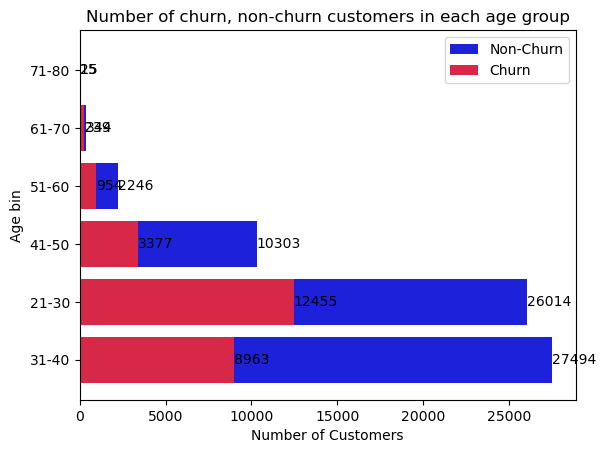

In [18]:
#So sánh số lượng khách hàng rời bỏ và không rời bỏ theo mỗi nhóm tuổi
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['AGE_BIN'] = pd.cut(x=df.age, bins=bins, labels=names, right=True)

age_cnt = df.AGE_BIN.value_counts()
age_0 = (df.AGE_BIN[df['churn'] == 0].value_counts())
age_1 = (df.AGE_BIN[df['churn'] == 1].value_counts())


fig, ax = plt.subplots()

# Plot the bars for non-churn customers
non_churn_bars=ax.barh(age_0.index, age_0, label='Non-Churn',color='#1d22da')

# Plot the bars for churn customers
churn_bars=ax.barh(age_1.index, age_1, label='Churn',color='#d72848')

# Set the title and labels
ax.set_title('Number of churn, non-churn customers in each age group')
ax.set_xlabel('Number of Customers')
ax.set_ylabel('Age bin')

# Add the value labels for non-churn bars
for bar in non_churn_bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='left', va='center')

# Add the value labels for churn bars
for bar in churn_bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='left', va='center')

# Add a legend
ax.legend()

# Display the plot
plt.show()

In [19]:
#Xóa cột age_bin đã tạo
df.drop(['age', 'AGE_BIN'], axis=1, inplace=True)

Đối tượng chủ yếu sử dụng dịch vụ của MBBank và được ghi lại trong dataset sẽ nằm trong nhóm tuổi 31-40 và 21-30.
- Đối với nhóm tuổi 31-40 (Số khách hàng: 27494): Số lượng khách hàng non-churn nhiều gấp 2 lần số lượng khách hàng churn. Điều này thể hiện độ trung thành của tập khách hàng này khi họ đã có thu nhập ổn định và nhu cầu sử dụng dịch vụ cao với nhiều mục đích như chuyển khoản, gửi tiết kiệm, v.v.
- Đối với nhóm tuổi 21-30 (Số khách hàng: 26014): Số lượng khách hàng non-churn và churn xấp xỉ bằng nhau. Tập khách hàng này còn trẻ nên chưa có thu nhập ổn định và chưa hiểu rõ tầm quan trọng của dịch vụ ngân hàng nói chung. Điều này dẫn tới hành vi sử dụng dịch vụ của tập khách hàng này chưa thực sự trung thành hay chưa sử dụng dịch vụ thường xuyên. 
- Đối với nhóm tuổi 41-50 (Số khách hàng: 10303): Từ nhóm tuổi này trở đi, số lượng khách hàng được ghi lại trong dataset bắt đầu có xu hướng giảm dần do thiếu hiểu biết, sự quen thuộc và sự tin tưởng với tín dụng công nghệ và dịch vụ ngân hàng nói chung. Về độ trung thành của khách hàng, số lượng khách hàng non-churn gấp 3 lần số lượng khách hàng churn với insight giống với nhóm tuổi 31-40.

Với tập khách hàng người cao tuổi từ 51-60 tuổi trở lên, họ không còn nằm trong tập khách hàng mục tiêu của MBBank với tổng khách hàng được ghi lại trong dataset dưới 2500.

Điểm chung của tất cả các tập khách hàng chia theo các nhóm tuổi khác nhau là số lượng khách hàng non-churn luôn lớn hơn khách hàng churn, thể hiện được mức độ uy tín và dịch vụ khách hàng tốt của MBBank.

**Gender and Churn**

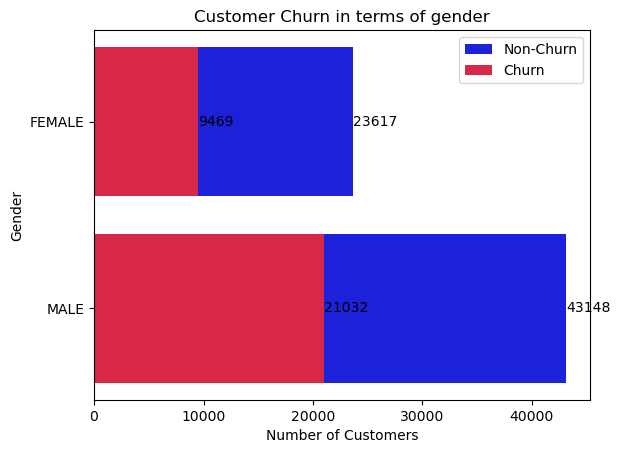

In [20]:
gender_cnt = df.local_ref_1.value_counts()
gender_0 = (df.local_ref_1[df['churn'] == 0].value_counts())
gender_1 = (df.local_ref_1[df['churn'] == 1].value_counts())

fig, ax = plt.subplots()

# Plot the bars for non-churn customers
non_churn_bars=ax.barh(gender_0.index, gender_0, label='Non-Churn',color='#1d22da')

# Plot the bars for churn customers
churn_bars=ax.barh(gender_1.index, gender_1, label='Churn',color='#d72848')

# Set the title and labels
ax.set_title('Customer Churn in terms of gender')
ax.set_xlabel('Number of Customers')
ax.set_ylabel('Gender')

# Add the value labels for non-churn bars
for bar in non_churn_bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='left', va='center')

# Add the value labels for churn bars
for bar in churn_bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='left', va='center')

# Add a legend
ax.legend()

# Display the plot
plt.show()

Xét về giới tính, số lượng nam giới sử dụng dịch vụ nhiều gấp đôi số lượng nữ giới. Tuy nhiên, số lượng khác hàng non-churn luôn lớn hơn churn ở cả 2 nhóm giới tính, cụ thể hơn:

Đối với nam (Số khách hàng: 43148): Số lượng khách hàng churn và non-churn xấp xỉ bằng nhau.
Đối với nữ (Số khách hàng: 23617): Số lượng khách hàng non-churn gấp 2.5 lần số lượng khách hàng churn.

#### **Marital status and Churn**

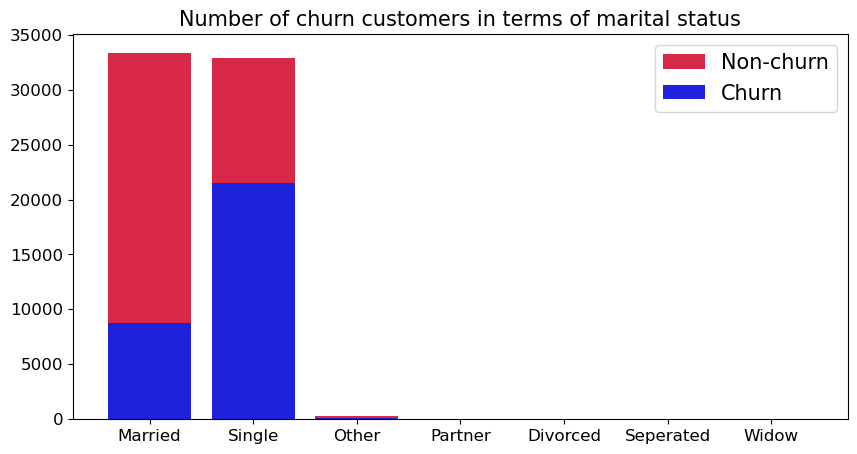

In [21]:
marital_status_cnt = df.vn_marital_status.value_counts()
marital_status_0 = (df.vn_marital_status[df['churn'] == 0].value_counts())
marital_status_1 = (df.vn_marital_status[df['churn'] == 1].value_counts())

plt.subplots(figsize=(10,5))

plt.bar(marital_status_0.index, marital_status_0.values, label='Non-churn',color='#d72848')
plt.bar(marital_status_1.index, marital_status_1.values,label='Churn',color='#1d22da')
for bar in non_churn_bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='left', va='center')

# Add the value labels for churn bars
for bar in churn_bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='left', va='center')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of churn customers in terms of marital status", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

Xét về tình trạng hôn nhân, đa số khách hàng được ghi lại trong dataset thuộc tập khách hàng Married (Đã kết hôn) và Single (Độc thân):

- Tập khách hàng Married: Số lượng khách hàng non-churn gấp 3 lần khách hàng churn do người có gia đình thường có trách nhiệm tài chính chung và mong muốn tăng cường sự ổn định tài chính với vợ/chồng trong việc quản lý các khoản chi tiêu hằng ngày, tiết kiệm và đầu tư; đồng thời do công việc ổn định hơn và tổng thu nhập của người đã kết hôn và vợ/chồng của họ khả năng cao sẽ lớn hơn người có tình trạng hôn nhân khác.
- Tập khách hàng Single: Số lượng khách hàng churn gấp hơn 2 lần khách hàng non-churn do tập khách hàng này đa số sẽ nằm trong độ tuổi dưới 30 (độ tuổi đang trong quá trình học chương trình giáo dục cơ bản và thu nhập chưa nhiều để hình thành nhu cầu sử dịch vụ ngân hàng) và chưa có bạn đồng hành để có trách nhiệm cao trong việc quản lí tài chính.

**Amount and Churn**

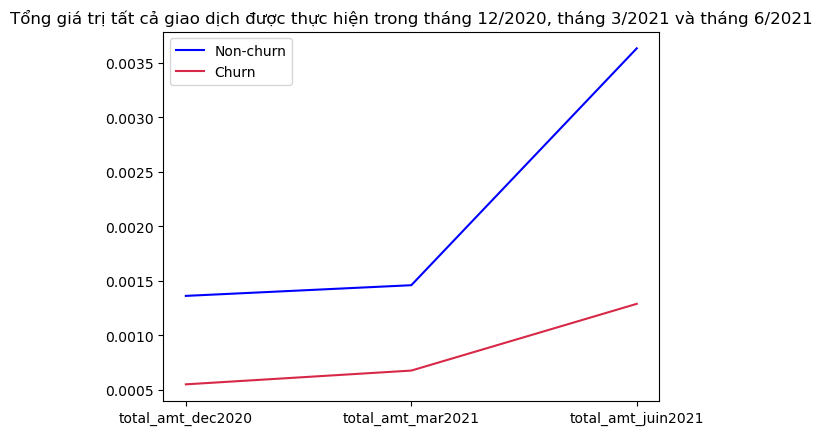

In [22]:
#Total amount of transaction customer made in 11/2020, 3/2021 and 6/2021
df_churn_0 = df[df['churn'] == 0].drop(columns=['churn'])
df_churn_1 = df[df['churn'] == 1].drop(columns=['churn'])

columns = ['amount_month','total_amt_mar2021','total_amt_juin2021']#,'total_amt_mar2021','total_amt_juin2021']

# Tạo list giá trị trung bình cho từng cột và từng trường hợp churn
churn_0_mean = [df_churn_0[col].mean() for col in columns]
churn_1_mean = [df_churn_1[col].mean() for col in columns]

# Tạo list chỉ số x cho các nhóm cột
x = np.arange(len(columns))



plt.plot(columns,churn_0_mean,label='Non-churn',color='blue')
plt.plot(columns, churn_1_mean,label='Churn',color='#d72848')
plt.legend()
plt.title('Tổng giá trị tất cả giao dịch được thực hiện trong tháng 12/2020, tháng 3/2021 và tháng 6/2021')
custom_labels = ['total_amt_dec2020','total_amt_mar2021','total_amt_juin2021']
plt.xticks(x, custom_labels)
plt.show()

Trong biểu đồ đường thể hiện tổng giá trị tất cả giao dịch được thực hiện trong tháng, cụ thể là tháng 12/2020, tháng 3/2021 và tháng 6/2021, chúng ta có thể dễ dàng thấy được xu hướng tăng dần theo thời gian của cả 2 tập khách hàng churn và non-churn:
- Từ tháng 12/2020 đến tháng 3/2021: Biểu đồ đường của khách hàng churn và non-churn song song với nhau (hiệu số lượng khách hàng churn và non-churn gần như không thay đổi) thể hiện sự ổn định về lượng khách hàng đầu vào và đầu ra của MBBank.
- Từ tháng 3/2021 đến tháng 6/2021: Số lượng khách hàng non-churn tăng đột biến so với lượng khách hàng churn cho đến tháng 6/2021, lượng khách hàng non-churn gấp xấp xỉ 3.5 lần lượng khách hàng churn. Kết quả tích cực này đã phần nào khách hàng được sự thành công của MBBank trong việc thu hút khách hàng mới cũng như duy trì các khách hàng trung thành, và hạn chế tối đa khách hàng ít hoặc từ bỏ sử dụng dịch vụ của ngân hàng này. 

#### Types of transaction

In [23]:
#Types of transactions:
df['most_act_juin2021'].unique()

array(['Giao dich chuyen khoan', 'Giao dich thanh toan', nan,
       'GIAO DICH RUT TIEN ATM', 'GIAO DICH TIET KIEM',
       'GIAO DICH PHI TAI CHINH', 'GIAO DICH THANH TOAN', 'GIAO DICH VAY'],
      dtype=object)

In [24]:
#change the format of values in columns:most_act_mar2021 and most_act_juin2021 (as they have both lower case and upper case)
new_most_act_mar2021=[]
new_most_act_juin2021=[]
for i in range(len(df['most_act_mar2021'])):
    new_most_act_mar2021.append(str(df['most_act_mar2021'][i]).lower())
    new_most_act_juin2021.append(str(df['most_act_juin2021'][i]).lower())
df1 = pd.DataFrame()
df1['most_act_juin2021']=new_most_act_juin2021
df1['most_act_mar2021']=new_most_act_mar2021
#drop nan
df1 = df1[df1['most_act_mar2021'] != 'nan']
df1 = df1[df1['most_act_juin2021'] != 'nan']
#reset the index of  dataframe
df1 = df1.reset_index(drop=True)

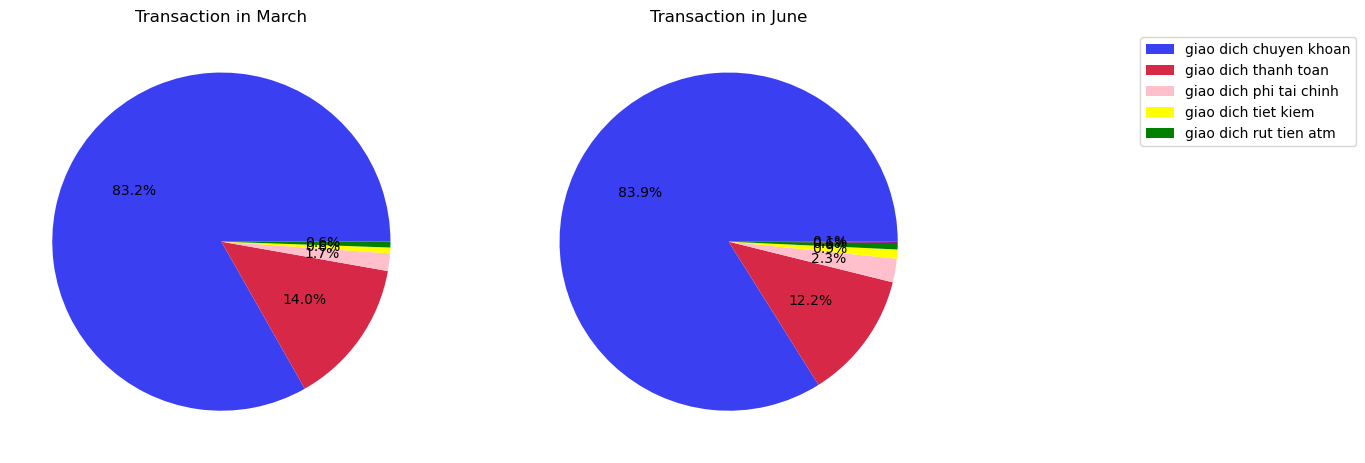

<Figure size 1500x1000 with 0 Axes>

In [25]:
#The type of transaction which is most made in March and June 2021
# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 6))


transaction_counts = df1['most_act_mar2021'].value_counts()
transaction_counts_juin = df1['most_act_juin2021'].value_counts()
# Create a pie chart
ax1.pie(transaction_counts,  autopct='%1.1f%%',colors=['#3a3ff2','#d72848','pink','yellow','green','purple'])
ax2.pie(transaction_counts_juin,  autopct='%1.1f%%',colors=['#3a3ff2','#d72848','pink','yellow','green','purple'])
# Set the aspect ratio to be equal so that the pie is circular
#plt.axis('equal')

# Set chart title
ax1.set_title('Transaction in March')
ax2.set_title('Transaction in June')
# Display the chart
plt.legend(labels=transaction_counts.index,bbox_to_anchor=(2, 1), loc='upper right')
plt.figure(figsize=(15, 10))
plt.show()

Trong tất cả các loại giao dịch được thực hiện bởi khách hàng được ghi lại trong dataset, loại giao dịch được thực hiện nhiều nhất là Giao dịch chuyển khoản. Loại giao dịch này trong cả tháng 3/2021 và tháng 6/2021 đều chiếm phần lớn lần lượt với 83.2% và 83.9%. 

Tiếp theo, loại dịch vụ được sử dụng nhiều thứ hai là Giao dịch thanh toán, nhưng cách xa về chỉ số so với Giao dịch chuyển khoản khi chỉ có 14% khách hàng sử dụng trong tháng 3/2021 và 12.2% trong tháng 6/2021.

Với các loại giao dịch con lại như Giao dịch phi tài chính, Giao dịch tiết kiệm, Giao dịch rút tiền ATM, phần trăm khách hàng sử dụng không đáng kể và xấp xỉ gần bằng nhau. 

# **Data Wrangling**

## **Data Cleaning**

### **Missing value handling**

In [26]:
df.head()

,local_ref_1,vn_marital_status,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,distinct_payment_code_month,count_payment_code_month,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,most_act_mar2021_count,most_act_mar2021,total_act_mar2021,total_amt_mar2021,most_act_juin2021_count,most_act_juin2021,total_act_juin2021,total_amt_juin2021,rd_id,churn
0,MALE,Married,1992.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.000056,0.000204,0.000008,0.0,0.0,2.0,12.0,0.000073,0.000400,5.920000e-06,0,0,2,33,5.0,Giao dich chuyen khoan,5.0,0.000016,14.0,Giao dich chuyen khoan,17.0,0.006543,1542621943,0
1,MALE,Single,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000019,0.000140,0.000203,0.0,0.0,1.0,1.0,0.000014,0.000068,1.103180e-04,0,0,2,5,NaN,NaN,NaN,NaN,1.0,Giao dich thanh toan,1.0,0.000062,1570544787,0
2,MALE,Married,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000030,0.000122,0.000143,0.0,0.0,1.0,2.0,0.000016,0.000060,2.100000e-05,2,3,2,7,4.0,Giao dich chuyen khoan,6.0,0.000046,1.0,Giao dich chuyen khoan,2.0,0.000071,636921018,0
3,MALE,Single,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,642516181,1
4,MALE,Married,1989.0,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,0.000097,0.000247,0.000001,1.0,5.0,3.0,12.0,0.000074,0.000380,5.920000e-07,1,11,3,24,9.0,Giao dich chuyen khoan,10.0,0.000170,17.0,Giao dich chuyen khoan,19.0,0.000575,1308443119,0


In [27]:
# Checking missing value
total_missing_value = df.isnull().sum().sort_values(ascending = False)
percent_missing_value = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total_missing_value, percent_missing_value], axis=1, keys=['Total', 'Percent']).transpose()

,amount_week,max_amount_week,min_amount_week,distinct_ref_no_week,distinct_trans_group_week,distinct_payment_code_week,count_payment_code_week,total_amt_juin2021,most_act_juin2021,total_act_juin2021,most_act_juin2021_count,total_amt_mar2021,most_act_mar2021,total_act_mar2021,most_act_mar2021_count,amount_month,max_amount_month,min_amount_month,distinct_payment_code_month,distinct_ref_no_month,distinct_trans_group_month,count_payment_code_month,min_amount_3month,max_amount_3month,amount_3month,vn_marital_status,local_ref_1,birth_incorp_date,distinct_ref_no_3month,distinct_trans_group_3month,count_payment_code_3month,distinct_payment_code_3month,rd_id,churn
Total,45200.0,45200.0,45200.0,43150.00,43150.00,43150.00,43150.00,29336.000,28625.000,28623.000,28623.000,27145.000,26524.000,26523.000,26523.000,23000.0,23000.0,23000.0,17777.000,17777.000,17777.000,17777.000,13480.00,13480.00,13480.00,3029.000,2734.000,10.00,0.0,0.0,0.0,0.0,0.0,0.0
Percent,45.2,45.2,45.2,43.15,43.15,43.15,43.15,29.336,28.625,28.623,28.623,27.145,26.524,26.523,26.523,23.0,23.0,23.0,17.777,17.777,17.777,17.777,13.48,13.48,13.48,3.029,2.734,0.01,0.0,0.0,0.0,0.0,0.0,0.0


Có thể thấy dữ liệu bị thiếu khá nhiều, cụ thể: 
- Nhóm dữ liệu giao dịch theo tuần trước năm 2021 bị thiếu nhiều nhất (45.2%) (tuy nhiên có thể sử dụng dữ liệu giao dịch tháng và 3 tháng để thay thế)
- Nhóm dữ liệu giao dịch trong tháng 6 năm 2021 (29.336%) (tuy nhiên theo giả định từ ban đầu, dữ liệu bị nan ở tháng này hầu hết đều là khách hàng rời bỏ) 

#### **Categorical Features**

**Sex and Mariatal Status**

In [28]:
# Rename columns
df.rename(columns={'rd_id':'id','local_ref_1':'sex', 'vn_marital_status':'marital_status'}, inplace=True)
df.head()

,sex,marital_status,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,distinct_payment_code_month,count_payment_code_month,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,most_act_mar2021_count,most_act_mar2021,total_act_mar2021,total_amt_mar2021,most_act_juin2021_count,most_act_juin2021,total_act_juin2021,total_amt_juin2021,id,churn
0,MALE,Married,1992.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.000056,0.000204,0.000008,0.0,0.0,2.0,12.0,0.000073,0.000400,5.920000e-06,0,0,2,33,5.0,Giao dich chuyen khoan,5.0,0.000016,14.0,Giao dich chuyen khoan,17.0,0.006543,1542621943,0
1,MALE,Single,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000019,0.000140,0.000203,0.0,0.0,1.0,1.0,0.000014,0.000068,1.103180e-04,0,0,2,5,NaN,NaN,NaN,NaN,1.0,Giao dich thanh toan,1.0,0.000062,1570544787,0
2,MALE,Married,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000030,0.000122,0.000143,0.0,0.0,1.0,2.0,0.000016,0.000060,2.100000e-05,2,3,2,7,4.0,Giao dich chuyen khoan,6.0,0.000046,1.0,Giao dich chuyen khoan,2.0,0.000071,636921018,0
3,MALE,Single,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,642516181,1
4,MALE,Married,1989.0,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,0.000097,0.000247,0.000001,1.0,5.0,3.0,12.0,0.000074,0.000380,5.920000e-07,1,11,3,24,9.0,Giao dich chuyen khoan,10.0,0.000170,17.0,Giao dich chuyen khoan,19.0,0.000575,1308443119,0


In [29]:
# Drop missing values
df = df.dropna(subset=['sex', 'marital_status'])

In [30]:
df.shape

(96918, 34)

In [31]:
# Merge Mariatal Status
df['marital_status'] = df['marital_status'].replace(['Partner', 'Divorced', 'Separated', 'Widow', 'Seperated'], 'Other')
df['marital_status'].value_counts()

Single     54384
Married    42088
Other        446
Name: marital_status, dtype: int64

**Most act in Mars and Juin 2021**

Nếu dropna ở 2 features này thì sẽ mất hết tất cả khách hàng rời bỏ.\
Có thể thấy rằng khách hàng Churn thường sẽ không có thông tin "Loại giao dịch sử dụng nhiều nhất". Vì thế feature "Loại giao dịch sử dụng nhiều nhất" không hiệu quả để xây dựng mô hình

In [32]:
df.drop(['most_act_mar2021', 'most_act_juin2021'], axis=1, inplace=True)

In [33]:
df.shape

(96918, 32)

#### **Numerical Features**

##### **Missing value Handling**

In [34]:
# Checking missing value
total_missing_value = df.isnull().sum().sort_values(ascending = False)
percent_missing_value = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total_missing_value, percent_missing_value], axis=1, keys=['Total', 'Percent']).transpose()

,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,total_amt_juin2021,most_act_juin2021_count,total_act_juin2021,total_amt_mar2021,most_act_mar2021_count,total_act_mar2021,min_amount_month,max_amount_month,amount_month,count_payment_code_month,distinct_trans_group_month,distinct_payment_code_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,birth_incorp_date,id,sex,distinct_ref_no_3month,distinct_trans_group_3month,count_payment_code_3month,distinct_payment_code_3month,marital_status,churn
Total,43973.000000,43973.000000,43973.000000,41958.000000,41958.000000,41958.000000,41958.000000,28770.000000,28073.000000,28073.000000,26662.000000,26052.000000,26052.000000,22609.000000,22609.000000,22609.000000,17453.000000,17453.000000,17453.000000,17453.000000,13390.000000,13390.000000,13390.000000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,45.371345,45.371345,45.371345,43.292268,43.292268,43.292268,43.292268,29.684888,28.965724,28.965724,27.509854,26.880456,26.880456,23.327968,23.327968,23.327968,18.008007,18.008007,18.008007,18.008007,13.815803,13.815803,13.815803,0.004127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df.columns

Index(['sex', 'marital_status', 'birth_incorp_date', 'amount_week',
       'max_amount_week', 'min_amount_week', 'distinct_payment_code_week',
       'count_payment_code_week', 'distinct_trans_group_week',
       'distinct_ref_no_week', 'amount_month', 'max_amount_month',
       'min_amount_month', 'distinct_payment_code_month',
       'count_payment_code_month', 'distinct_trans_group_month',
       'distinct_ref_no_month', 'amount_3month', 'max_amount_3month',
       'min_amount_3month', 'distinct_payment_code_3month',
       'count_payment_code_3month', 'distinct_trans_group_3month',
       'distinct_ref_no_3month', 'most_act_mar2021_count', 'total_act_mar2021',
       'total_amt_mar2021', 'most_act_juin2021_count', 'total_act_juin2021',
       'total_amt_juin2021', 'id', 'churn'],
      dtype='object')

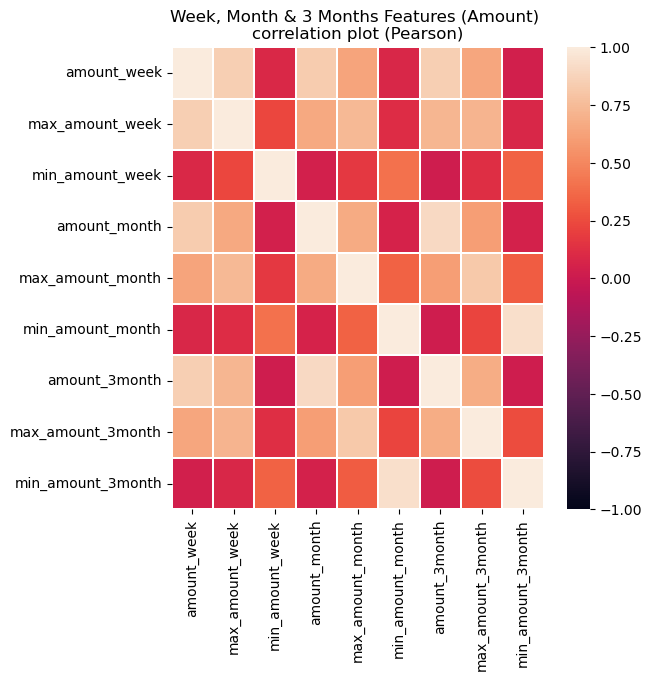

In [36]:
var = [
       'amount_week',
       'max_amount_week', 'min_amount_week',
       'amount_month', 'max_amount_month',
       'min_amount_month', 
       'amount_3month', 'max_amount_3month',
       'min_amount_3month'
       ]

plt.figure(figsize = (6,6))
plt.title('Week, Month & 3 Months Features (Amount) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

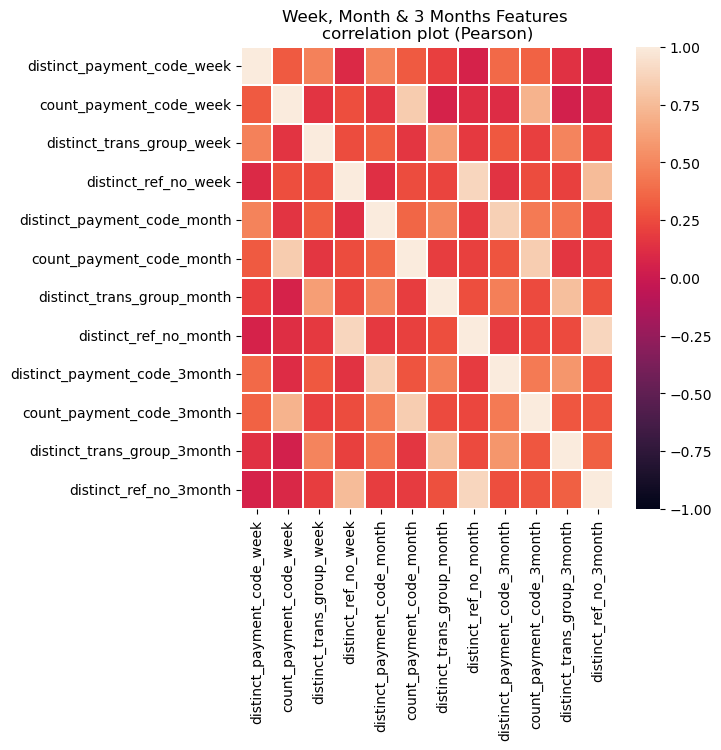

In [37]:
var = ['distinct_payment_code_week',
       'count_payment_code_week', 'distinct_trans_group_week',
       'distinct_ref_no_week', 'distinct_payment_code_month',
       'count_payment_code_month', 'distinct_trans_group_month',
       'distinct_ref_no_month', 'distinct_payment_code_3month',
       'count_payment_code_3month', 'distinct_trans_group_3month',
       'distinct_ref_no_3month'
       ]

plt.figure(figsize = (6,6))
plt.title('Week, Month & 3 Months Features \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Có thể thấy rằng các nhóm chỉ số theo Tuần, theo Tháng, theo 3 Tháng có tương quan với nhau rất cao. Tuy nhiên, tỷ lệ missing value ở nhóm các chỉ số theo 3 Tháng là ít nhất.\
Vậy, nhóm bỏ các nhóm các chỉ số theo Tuần và theo Tháng, giữ lại nhóm chỉ số theo 3 Tháng để xây dựng mô hình.

In [38]:
df.drop(['amount_week',
       'max_amount_week', 'min_amount_week', 'distinct_payment_code_week',
       'count_payment_code_week', 'distinct_trans_group_week',
       'distinct_ref_no_week', 'amount_month', 'max_amount_month',
       'min_amount_month', 'distinct_payment_code_month',
       'count_payment_code_month', 'distinct_trans_group_month',
       'distinct_ref_no_month'], axis=1, inplace=True)

In [39]:
mask = df['churn'] == 1

df.loc[mask, ['amount_3month', 'max_amount_3month', 'min_amount_3month']] = df.loc[mask, ['amount_3month', 'max_amount_3month', 'min_amount_3month']].fillna(0)

Với các khách hàng rời bỏ (theo giả định đặt ra trước đó của nhóm), nhóm fill nan bằng giá trị 0 với ý nghĩa rằng giá trị giao dịch và các chỉ số liên quan của khách hàng đã rời bỏ bằng 0.

In [40]:
mask = df['churn'] == 0

df.loc[mask, ['amount_3month', 'max_amount_3month', 'min_amount_3month']] = df.loc[mask, ['amount_3month', 'max_amount_3month', 'min_amount_3month']].dropna()

Ngược lại, đối với các khách hàng không rời bỏ, nhóm drop các quan sát bị nan ở các chỉ số này.\
Kết quả cho thấy rằng số quan sát bị drop là khách hàng rời bỏ bị nan rất ít (hay chỉ số churn mà nhóm xây dựng là tốt).

In [41]:
df.shape

(96918, 18)

In [42]:
df.drop(['most_act_mar2021_count', 'total_act_mar2021', 'total_amt_mar2021',
       'most_act_juin2021_count', 'total_act_juin2021', 'total_amt_juin2021'], axis=1, inplace=True)

Nhóm chỉ sử dụng các chỉ số giao dịch tháng 3 và tháng 6 năm 2021 để xây dựng chỉ số churn, không sử dụng hai nhóm chỉ số này trong xây dựng mô hình.\
Vì nhóm đang nhắm đến dự đoán khách hàng rời bỏ trong tháng 6, tức là chỉ có dữ liệu giao dịch của khách hàng ở trước năm 2021 và dự đoán khả năng khách hàng rời bỏ vào 6 tháng sau. 

In [43]:
df['churn'].value_counts()

0    66501
1    30417
Name: churn, dtype: int64

In [45]:
df.isnull().sum()

sex                             0
marital_status                  0
birth_incorp_date               4
amount_3month                   0
max_amount_3month               0
min_amount_3month               0
distinct_payment_code_3month    0
count_payment_code_3month       0
distinct_trans_group_3month     0
distinct_ref_no_3month          0
id                              0
churn                           0
dtype: int64

Dữ liệu còn 4 quan sát bị missing ở feature 'birth_incorp_date'.

**Age**

Đổi tên cột birth_incorp_date sang birth_date.

In [46]:
# Rename columns
df.rename(columns={'birth_incorp_date':'birth_date'}, inplace=True)
df.head()

,sex,marital_status,birth_date,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,id,churn
0,MALE,Married,1992.0,0.000073,0.000400,5.920000e-06,0,0,2,33,1542621943,0
1,MALE,Single,1986.0,0.000014,0.000068,1.103180e-04,0,0,2,5,1570544787,0
2,MALE,Married,1980.0,0.000016,0.000060,2.100000e-05,2,3,2,7,636921018,0
3,MALE,Single,2001.0,0.000000,0.000000,0.000000e+00,0,0,1,1,642516181,1
4,MALE,Married,1989.0,0.000074,0.000380,5.920000e-07,1,11,3,24,1308443119,0


Tạo cột tuổi Age sử dụng cột năm sinh birth_date với năm mốc là 2021 và sau đó thực hiện bỏ đi cột birth_date

In [47]:
# Age 
age=[]
for i in df['birth_date']:
    x=2021-i
    age.append(x)
df['age']=age

In [48]:
df.drop(['birth_date'], axis=1, inplace=True)

In [49]:
df.head()

,sex,marital_status,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,id,churn,age
0,MALE,Married,0.000073,0.000400,5.920000e-06,0,0,2,33,1542621943,0,29.0
1,MALE,Single,0.000014,0.000068,1.103180e-04,0,0,2,5,1570544787,0,35.0
2,MALE,Married,0.000016,0.000060,2.100000e-05,2,3,2,7,636921018,0,41.0
3,MALE,Single,0.000000,0.000000,0.000000e+00,0,0,1,1,642516181,1,20.0
4,MALE,Married,0.000074,0.000380,5.920000e-07,1,11,3,24,1308443119,0,32.0


Thực hiện loại bỏ các quan sát bị rỗng về dữ liệu tuổi, sau đó kiểm tra các dữ liệu khuyết thiếu

In [50]:
# Drop missing values
df = df.dropna(subset=['age'])

Drop các quan sát bị nan ở feature 'age'.

In [51]:
# Checking missing value
total_missing_value = df.isnull().sum().sort_values(ascending = False)
percent_missing_value = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total_missing_value, percent_missing_value], axis=1, keys=['Total', 'Percent']).transpose()

,sex,marital_status,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,id,churn,age
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### **Outliers handling**

Trước hết, thực hiện vẽ biểu đồ phân bố của một số loại dữ liệu

C:\Users\Phong Vu\AppData\Local\Temp\ipykernel_14004\1118601332.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 0.98, 'Data frequency of each attributes')

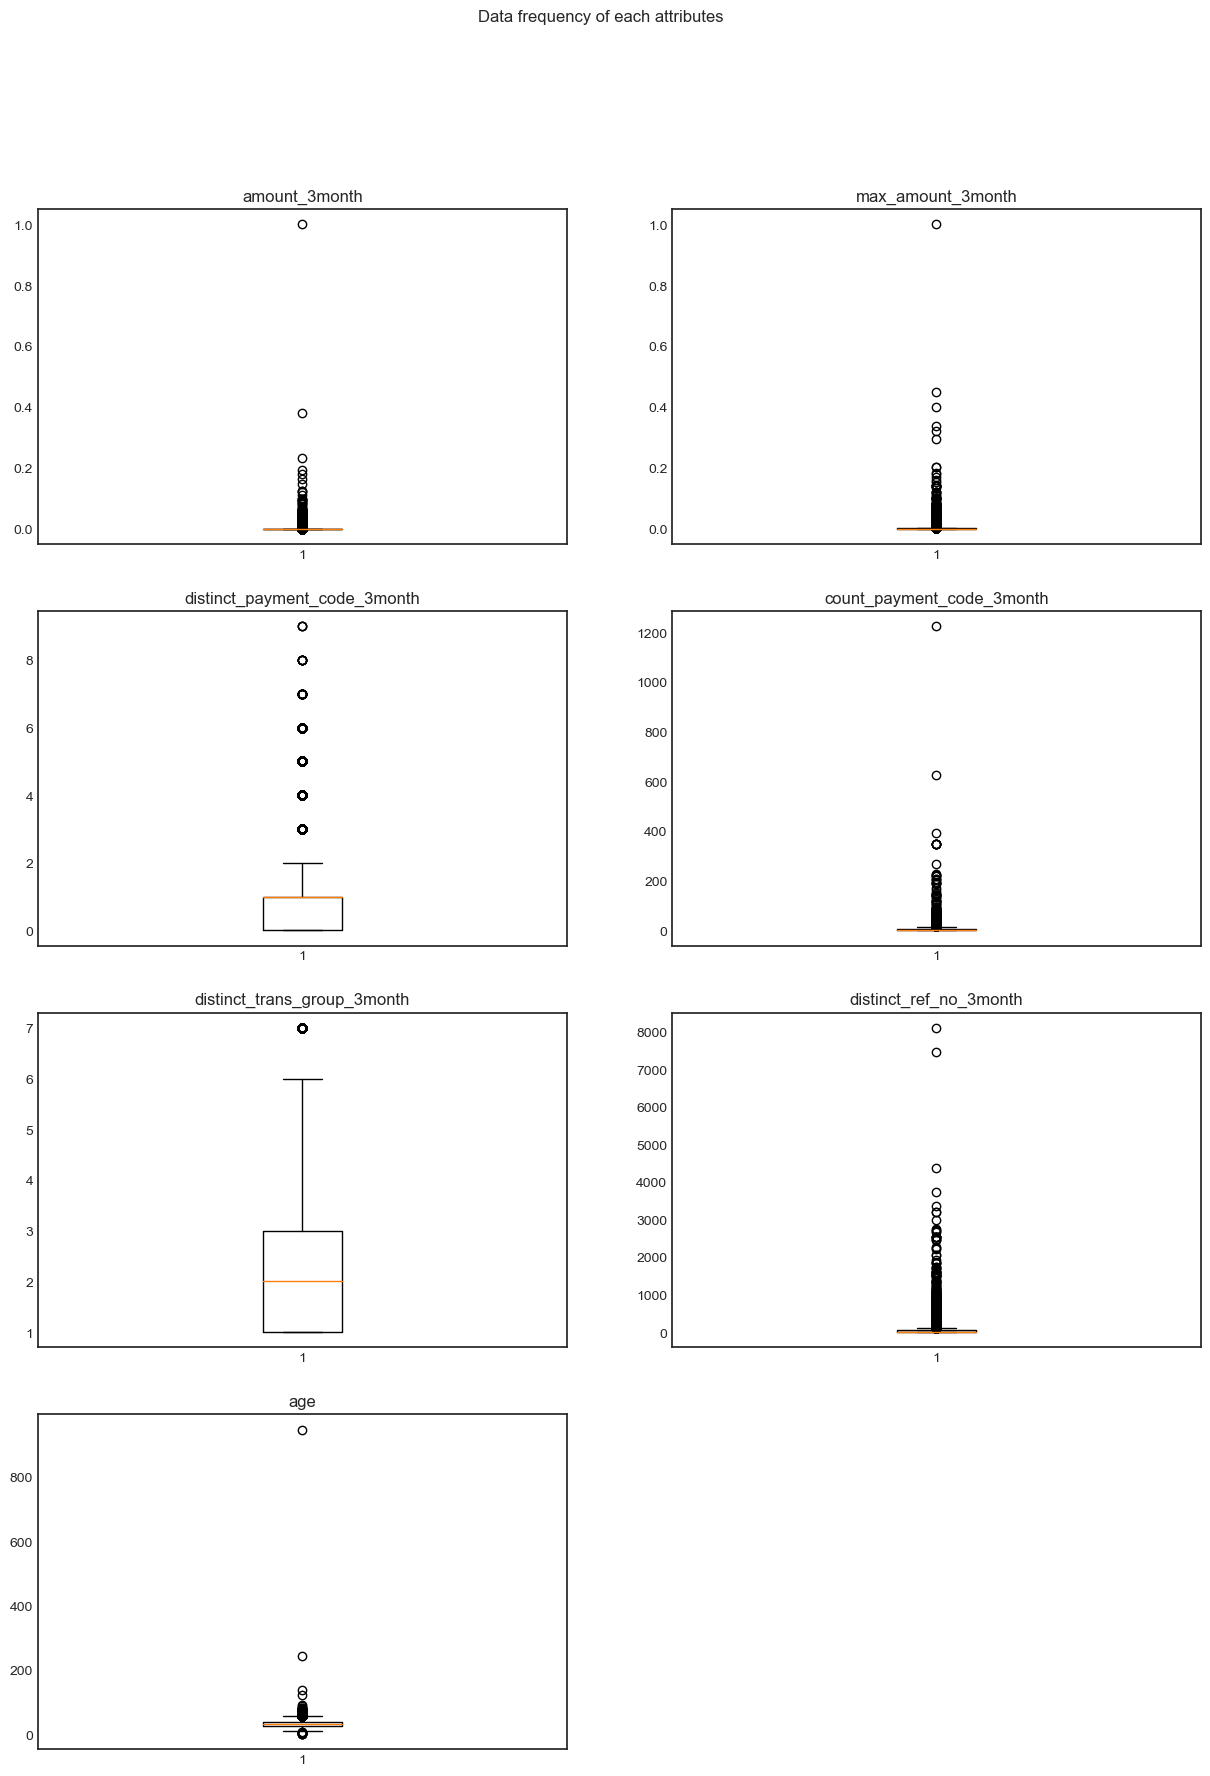

In [52]:
plt.figure(figsize = (15, 20))
plt.style.use('seaborn-white')
#amount_3month	max_amount_3month	min_amount_3month	distinct_payment_code_3month	count_payment_code_3month	distinct_trans_group_3month	distinct_ref_no_3month

ax=plt.subplot(421)
plt.boxplot(df['amount_3month'])
ax.set_title('amount_3month')

ax=plt.subplot(422)
plt.boxplot(df['max_amount_3month'])
ax.set_title('max_amount_3month')

ax=plt.subplot(423)
plt.boxplot(df['distinct_payment_code_3month'])
ax.set_title('distinct_payment_code_3month')

ax=plt.subplot(424)
plt.boxplot(df['count_payment_code_3month'])
ax.set_title('count_payment_code_3month')

ax=plt.subplot(425)
plt.boxplot(df['distinct_trans_group_3month'])
ax.set_title('distinct_trans_group_3month')

ax=plt.subplot(426)
plt.boxplot(df['distinct_ref_no_3month'])
ax.set_title('distinct_ref_no_3month')


ax=plt.subplot(427)
plt.boxplot(df['age'])
ax.set_title('age')

plt.suptitle('Data frequency of each attributes')

Thực hiện loại bỏ một số outlier với phương pháp Interquantile range (IQR): 
- Trước hết, ta xác định các khoảng phần tư thứ nhất Q1 và thứ ba Q3. IQR bằng Q3-Q1.
- Ta thực hiện lấy các giá trị lớn hơn và bằng Q1-1.5IQR và các giá trị nhỏ hơn và bằng Q3+1.5IQR.

In [53]:
numerical_features=['age','amount_3month', 'max_amount_3month', 'min_amount_3month',
       'distinct_payment_code_3month', 'count_payment_code_3month',
       'distinct_trans_group_3month', 'distinct_ref_no_3month']
for cols in numerical_features:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (df[cols] >= Q1 - 1.5 * IQR) & (df[cols] <= Q3 + 1.5 *IQR)
    df = df.loc[filter]

Thực hiện quan sát kiểm tra lại dữ liếu sau khi lọc.

C:\Users\Phong Vu\AppData\Local\Temp\ipykernel_14004\1118601332.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 0.98, 'Data frequency of each attributes')

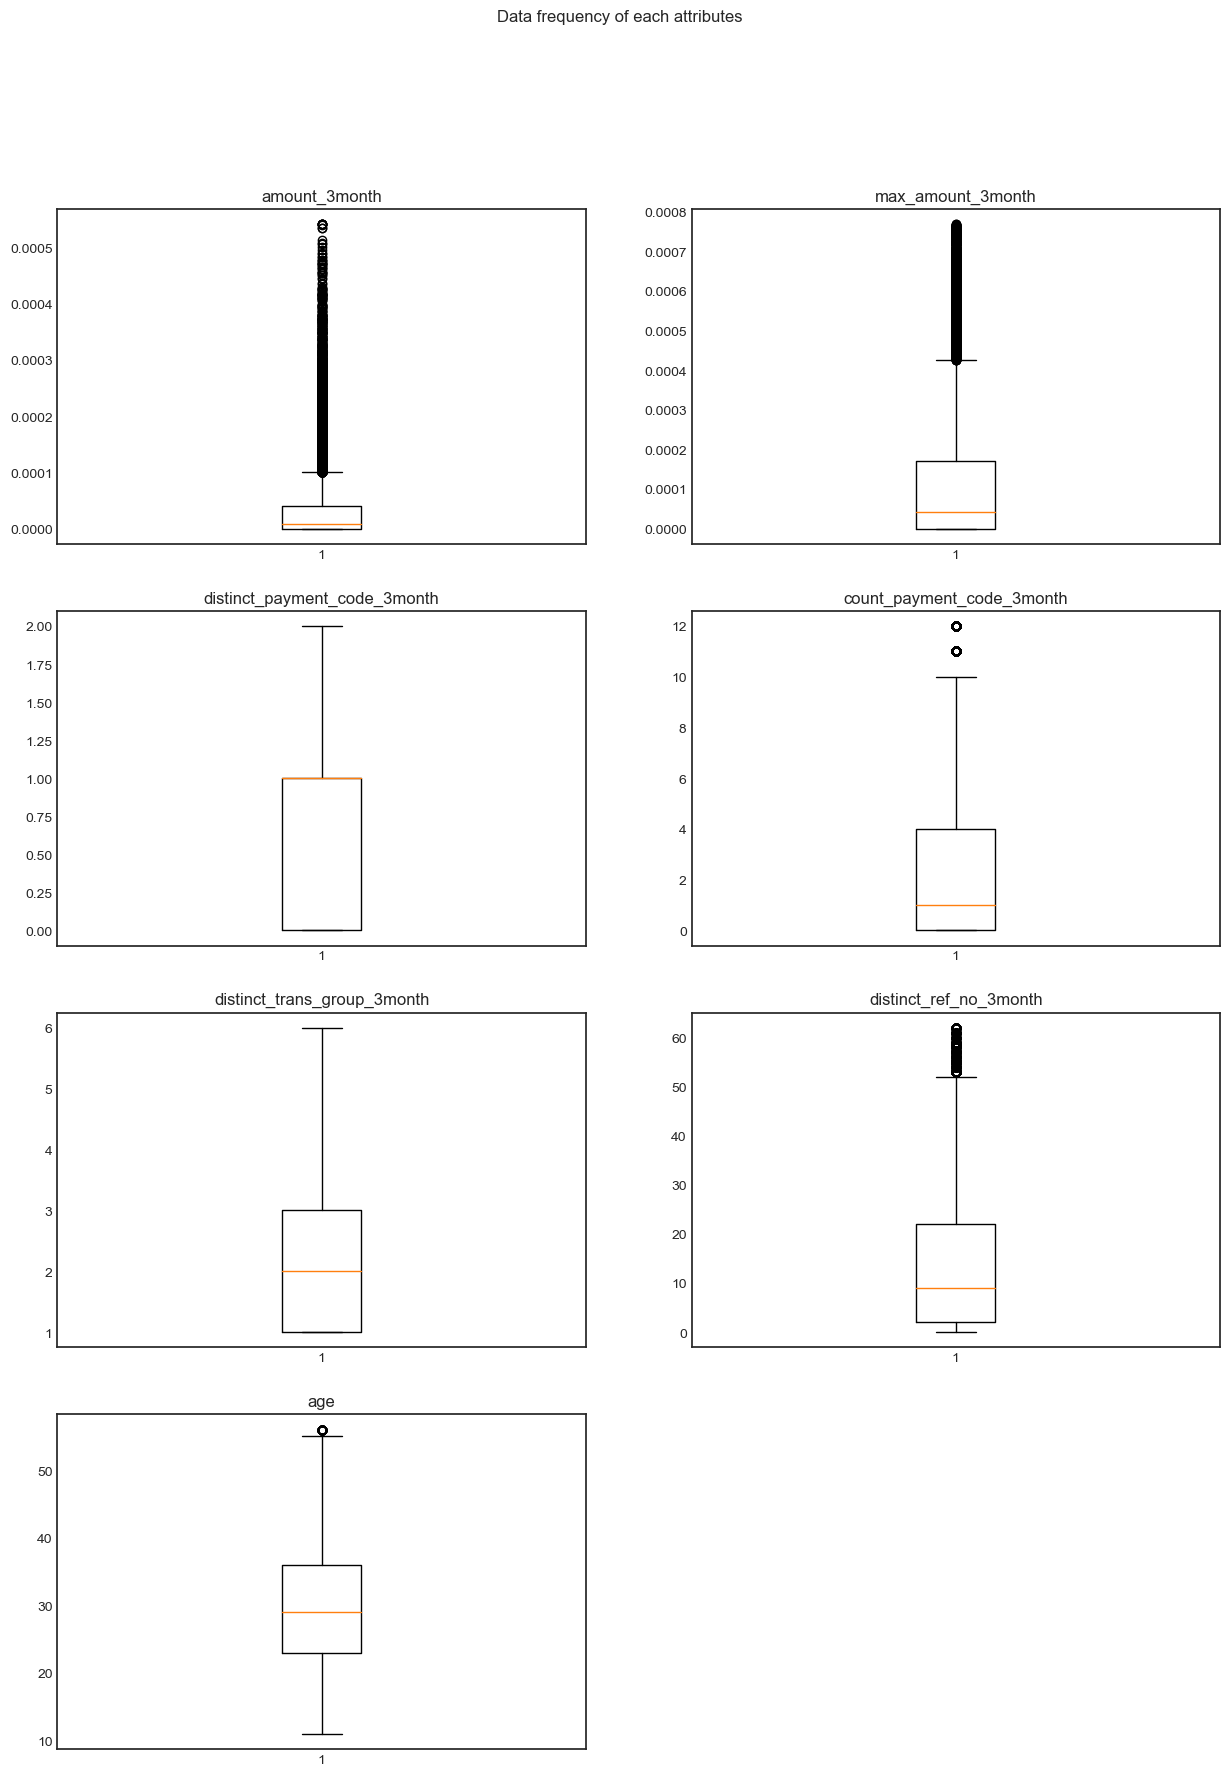

In [54]:
plt.figure(figsize = (15, 20))
plt.style.use('seaborn-white')
#amount_3month	max_amount_3month	min_amount_3month	distinct_payment_code_3month	count_payment_code_3month	distinct_trans_group_3month	distinct_ref_no_3month

ax=plt.subplot(421)
plt.boxplot(df['amount_3month'])
ax.set_title('amount_3month')

ax=plt.subplot(422)
plt.boxplot(df['max_amount_3month'])
ax.set_title('max_amount_3month')

ax=plt.subplot(423)
plt.boxplot(df['distinct_payment_code_3month'])
ax.set_title('distinct_payment_code_3month')

ax=plt.subplot(424)
plt.boxplot(df['count_payment_code_3month'])
ax.set_title('count_payment_code_3month')

ax=plt.subplot(425)
plt.boxplot(df['distinct_trans_group_3month'])
ax.set_title('distinct_trans_group_3month')

ax=plt.subplot(426)
plt.boxplot(df['distinct_ref_no_3month'])
ax.set_title('distinct_ref_no_3month')


ax=plt.subplot(427)
plt.boxplot(df['age'])
ax.set_title('age')

plt.suptitle('Data frequency of each attributes')

Kiểm tra lại dữ liệu và đếm các số quan sát dựa theo chỉ số churn.

In [55]:
df.shape

(51580, 12)

In [56]:
df['churn'].value_counts()

0    29090
1    22490
Name: churn, dtype: int64

## **Encoding**

Thực hiện chuyển đổi dữ liệu phục vụ cho bước sau: 
- Với cột giới tính (gender), giá trị Female thay thế bằng số 0 và giá trị Male thay thế bằng số 1
- Thực hiện lấy biến giả (get dummies) với các cột giới tính (sex) và cột tình trạng hôn nhân (marital_status)

In [57]:
# Label encoding for Sex
encoders_nums = {
                 "gender":{"FEMALE": 0, "MALE": 1}
}
df = df.replace(encoders_nums)

In [58]:
df.head()

,sex,marital_status,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,id,churn,age
0,MALE,Married,7.350000e-05,0.000400,5.920000e-06,0,0,2,33,1542621943,0,29.0
3,MALE,Single,0.000000e+00,0.000000,0.000000e+00,0,0,1,1,642516181,1,20.0
4,MALE,Married,7.450000e-05,0.000380,5.920000e-07,1,11,3,24,1308443119,0,32.0
5,MALE,Single,1.310000e-07,0.000001,5.920000e-07,1,5,1,5,435820450,1,28.0
6,MALE,Single,0.000000e+00,0.000000,0.000000e+00,0,0,1,2,1499819800,1,27.0


In [59]:
# Get Dummies for marital_status
df = pd.get_dummies(df,columns=['sex',
    'marital_status'])

In [60]:
df.head()

,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,id,churn,age,sex_FEMALE,sex_MALE,marital_status_Married,marital_status_Other,marital_status_Single
0,7.350000e-05,0.000400,5.920000e-06,0,0,2,33,1542621943,0,29.0,0,1,1,0,0
3,0.000000e+00,0.000000,0.000000e+00,0,0,1,1,642516181,1,20.0,0,1,0,0,1
4,7.450000e-05,0.000380,5.920000e-07,1,11,3,24,1308443119,0,32.0,0,1,1,0,0
5,1.310000e-07,0.000001,5.920000e-07,1,5,1,5,435820450,1,28.0,0,1,0,0,1
6,0.000000e+00,0.000000,0.000000e+00,0,0,1,2,1499819800,1,27.0,0,1,0,0,1


In [61]:
df.shape

(51580, 15)

In [62]:
df.to_csv('cleaned_data.csv')

In [63]:
df = pd.read_csv('cleaned_data.csv')


In [64]:
df.head()

,Unnamed: 0,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,id,churn,age,sex_FEMALE,sex_MALE,marital_status_Married,marital_status_Other,marital_status_Single
0,0,7.350000e-05,0.000400,5.920000e-06,0,0,2,33,1542621943,0,29.0,0,1,1,0,0
1,3,0.000000e+00,0.000000,0.000000e+00,0,0,1,1,642516181,1,20.0,0,1,0,0,1
2,4,7.450000e-05,0.000380,5.920000e-07,1,11,3,24,1308443119,0,32.0,0,1,1,0,0
3,5,1.310000e-07,0.000001,5.920000e-07,1,5,1,5,435820450,1,28.0,0,1,0,0,1
4,6,0.000000e+00,0.000000,0.000000e+00,0,0,1,2,1499819800,1,27.0,0,1,0,0,1


In [65]:
df.drop(['Unnamed: 0'],axis = 1, inplace = True)

# **Model Development**

- **Logistic Regression**
- **SVC**
- **Decision Tree**
- **Random Forest**

In [66]:
df_model = df.copy()

In [67]:
df_model.head()

,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,id,churn,age,sex_FEMALE,sex_MALE,marital_status_Married,marital_status_Other,marital_status_Single
0,7.350000e-05,0.000400,5.920000e-06,0,0,2,33,1542621943,0,29.0,0,1,1,0,0
1,0.000000e+00,0.000000,0.000000e+00,0,0,1,1,642516181,1,20.0,0,1,0,0,1
2,7.450000e-05,0.000380,5.920000e-07,1,11,3,24,1308443119,0,32.0,0,1,1,0,0
3,1.310000e-07,0.000001,5.920000e-07,1,5,1,5,435820450,1,28.0,0,1,0,0,1
4,0.000000e+00,0.000000,0.000000e+00,0,0,1,2,1499819800,1,27.0,0,1,0,0,1


In [68]:
X = df_model.drop(['id', 'churn'], axis=1)
y = df_model['churn']

In [69]:
# Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify = y)

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Logistic Regression**

In [184]:
logistic_model = LogisticRegression()

In [185]:
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [186]:
y__train_predict_lr = logistic_model.predict(X_train)

<Axes: >

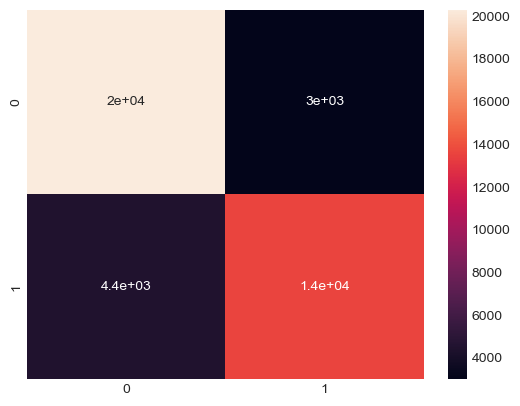

In [187]:
cf_lr = confusion_matrix(y_train, y__train_predict_lr)
sns.heatmap(cf_lr, annot=True)

Số lượng khách hàng churn và non-churn được dự báo đúng nhiều hơn hẳn số lượng các dự báo có kết quả sai

In [188]:
# Get the predicted classes
train_class_preds = logistic_model.predict(X_train)

In [189]:
accu_cv_lgt = cross_val_score(logistic_model, X_train, y_train, cv=4, scoring='accuracy')
pre_cv_lgt = cross_val_score(logistic_model, X_train, y_train, cv=4, scoring='precision')
recall_cv_lgt = cross_val_score(logistic_model, X_train, y_train, cv=4, scoring='recall')
f1_cv_lgt = cross_val_score(logistic_model, X_train, y_train, cv=4, scoring='f1')
roc_auc_cv_lgt = cross_val_score(logistic_model, X_train, y_train, cv=4, scoring='roc_auc')

print(f"The mean accuracy of the folds = {accu_cv_lgt.mean()} +- {accu_cv_lgt.std()}")
print(f"The mean precision of the folds = {pre_cv_lgt.mean()} +- {pre_cv_lgt.std()}")
print(f"The mean recall of the folds = {recall_cv_lgt.mean()} +- {recall_cv_lgt.std()}")
print(f"The mean f1 of the folds = {f1_cv_lgt.mean()} +- {f1_cv_lgt.std()}")
print(f"The mean roc_auc of the folds = {roc_auc_cv_lgt.mean()} +- {roc_auc_cv_lgt.std()}")

The mean accuracy of the folds = 0.8200610701822412 +- 0.0032602879979806427
The mean precision of the folds = 0.8185808156076568 +- 0.004128736444229687
The mean recall of the folds = 0.7545575811471765 +- 0.005639684701630006
The mean f1 of the folds = 0.785255783684844 +- 0.004133366704022681
The mean roc_auc of the folds = 0.8807931050597942 +- 0.003221910946291069


## **SVC**

In [190]:
svc = SVC()

In [191]:
svc.fit(X_train,y_train)

SVC()

In [192]:
y_train_predict_svc = svc.predict(X_train)

<Axes: >

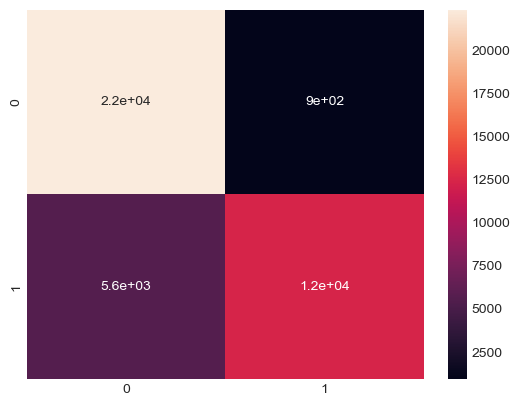

In [193]:
# Confusion Matrix
cf_svc = confusion_matrix(y_train, y_train_predict_svc)
sns.heatmap(cf_svc, annot=True)

Số lượng khách hàng churn và non-churn được dự báo đúng nhiều hơn hẳn số lượng các dự báo có kết quả sai

In [194]:
# Get the predicted classes
train_class_preds = svc.predict(X_train)

In [195]:
accu_cv_svc = cross_val_score(svc, X_train, y_train, cv=4, scoring='accuracy')
pre_cv_svc = cross_val_score(svc, X_train, y_train, cv=4, scoring='precision')
recall_cv_svc = cross_val_score(svc, X_train, y_train, cv=4, scoring='recall')
f1_cv_svc = cross_val_score(svc, X_train, y_train, cv=4, scoring='f1')
roc_auc_cv_svc = cross_val_score(svc, X_train, y_train, cv=4, scoring='roc_auc')
print(f"The mean accuracy of the folds = {accu_cv_svc.mean()} +- {accu_cv_svc.std()}")
print(f"The mean precision of the folds = {pre_cv_svc.mean()} +- {pre_cv_svc.std()}")
print(f"The mean recall of the folds = {recall_cv_svc.mean()} +- {recall_cv_svc.std()}")
print(f"The mean f1 of the folds = {f1_cv_svc.mean()} +- {f1_cv_svc.std()}")
print(f"The mean roc_auc of the folds = {roc_auc_cv_svc.mean()} +- {roc_auc_cv_svc.std()}")

The mean accuracy of the folds = 0.8415083365645599 +- 0.0027597209859416176
The mean precision of the folds = 0.9309540069635714 +- 0.005391206173867153
The mean recall of the folds = 0.6875277901289462 +- 0.0058409536040105025
The mean f1 of the folds = 0.7909111530879395 +- 0.0040262336098889516
The mean roc_auc of the folds = 0.8721819959017728 +- 0.0025508434517329394


## **Decision Tree Classification**

In [196]:
decision_tree = DecisionTreeClassifier()

In [197]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [198]:
y_train_predict_dt = decision_tree.predict(X_train)

<Axes: >

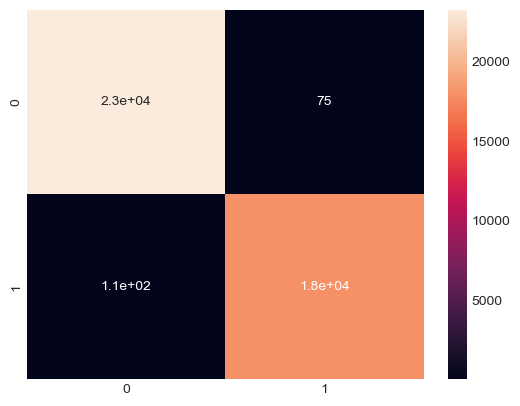

In [199]:
cf_dt = confusion_matrix(y_train, y_train_predict_dt)
sns.heatmap(cf_dt, annot=True)

Số lượng khách hàng churn và non-churn được dự báo đúng nhiều hơn hẳn số lượng các dự báo có kết quả sai

In [200]:
# Get the predicted classes
train_class_preds = decision_tree.predict(X_train)

In [201]:
accu_cv_dt = cross_val_score(decision_tree, X_train, y_train, cv=4, scoring='accuracy')
pre_cv_dt = cross_val_score(decision_tree, X_train, y_train, cv=4, scoring='precision')
recall_cv_dt = cross_val_score(decision_tree, X_train, y_train, cv=4, scoring='recall')
f1_cv_dt = cross_val_score(decision_tree, X_train, y_train, cv=4, scoring='f1')
roc_auc_cv_dt = cross_val_score(decision_tree, X_train, y_train, cv=4, scoring='roc_auc')
print(f"The mean accuracy of the folds = {accu_cv_dt.mean()} +- {accu_cv_dt.std()}")
print(f"The mean precision of the folds = {pre_cv_dt.mean()} +- {pre_cv_dt.std()}")
print(f"The mean recall of the folds = {recall_cv_dt.mean()} +- {recall_cv_dt.std()}")
print(f"The mean f1 of the folds = {f1_cv_dt.mean()} +- {f1_cv_dt.std()}")
print(f"The mean roc_auc of the folds = {roc_auc_cv_dt.mean()} +- {roc_auc_cv_dt.std()}")

The mean accuracy of the folds = 0.8060294687863513 +- 0.000631950601512487
The mean precision of the folds = 0.768966416438925 +- 0.0019087682380799918
The mean recall of the folds = 0.7969097376611828 +- 0.0008392434899145214
The mean f1 of the folds = 0.7827416095757167 +- 0.0027346613620465995
The mean roc_auc of the folds = 0.8084118752370137 +- 0.0006068446425487411


## **Random Forest**

In [202]:
random_forest = RandomForestClassifier()

In [203]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [204]:
y_train_predict_rf = random_forest.predict(X_train)

<Axes: >

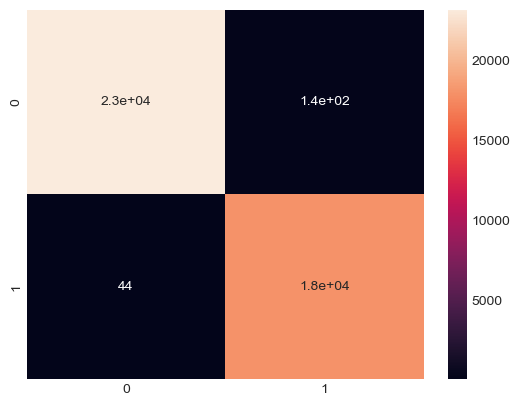

In [205]:
cf_rf = confusion_matrix(y_train, y_train_predict_rf)
sns.heatmap(cf_rf, annot=True)

Số lượng khách hàng churn và non-churn được dự báo đúng nhiều hơn hẳn số lượng các dự báo có kết quả sai

In [206]:
# Get the predicted classes
train_class_preds = random_forest.predict(X_train)

In [207]:
accu_cv_rf = cross_val_score(random_forest, X_train, y_train, cv=4, scoring='accuracy')
pre_cv_rf = cross_val_score(random_forest, X_train, y_train, cv=4, scoring='precision')
recall_cv_rf = cross_val_score(random_forest, X_train, y_train, cv=4, scoring='recall')
f1_cv_rf = cross_val_score(random_forest, X_train, y_train, cv=4, scoring='f1')
roc_auc_cv_rf = cross_val_score(random_forest, X_train, y_train, cv=4, scoring='roc_auc')
print(f"The mean accuracy of the folds = {accu_cv_rf.mean()} +- {accu_cv_rf.std()}")
print(f"The mean precision of the folds = {pre_cv_rf.mean()} +- {pre_cv_rf.std()}")
print(f"The mean recall of the folds = {recall_cv_rf.mean()} +- {recall_cv_rf.std()}")
print(f"The mean f1 of the folds = {f1_cv_rf.mean()} +- {f1_cv_rf.std()}")
print(f"The mean roc_auc of the folds = {roc_auc_cv_rf.mean()} +- {roc_auc_cv_rf.std()}")

The mean accuracy of the folds = 0.8685052345870492 +- 0.001659998428610277
The mean precision of the folds = 0.9237245151840997 +- 0.0018925818070131878
The mean recall of the folds = 0.7623943975100044 +- 0.0019084353838805463
The mean f1 of the folds = 0.8354145030140853 +- 0.0020296709724105548
The mean roc_auc of the folds = 0.9158785345337396 +- 0.0008986160559906833


## **Models Evaluation and Selection**

In [208]:
classifiers = ['Logistics Regression', 'SVC', 'Decision Tree Classifier', 'Random Forest Classifier']
accuracy = [accu_cv_lgt.mean(), accu_cv_svc.mean(), accu_cv_dt.mean(), accu_cv_rf.mean()]
precision_score = [pre_cv_lgt.mean(), pre_cv_svc.mean(), pre_cv_dt.mean(), pre_cv_rf.mean()]
recall_score = [recall_cv_lgt.mean(), recall_cv_svc.mean(), recall_cv_dt.mean(), recall_cv_rf.mean()]
f1_score = [f1_cv_lgt.mean(), f1_cv_svc.mean(), f1_cv_svc.mean(), f1_cv_rf.mean()]
# roc_auc_score=[roc_auc_cv_lgt.mean(),roc_auc_cv_svc.mean(),roc_auc_cv_dt.mean(),roc_auc_cv_rf.mean()]

In [209]:
model_comp = pd.DataFrame({'Classifier':classifiers, 'Accuracy score': accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score})
model_comp.style.background_gradient(cmap='Blues')

,Classifier,Accuracy score,Precision Score,Recall Score,F1 Score
0,Logistics Regression,0.820061,0.818581,0.754558,0.785256
1,SVC,0.841508,0.930954,0.687528,0.790911
2,Decision Tree Classifier,0.806029,0.768966,0.796910,0.790911
3,Random Forest Classifier,0.868505,0.923725,0.762394,0.835415


Dùng metric 'Recall' để lựa chọn mô hình tốt nhất.
 $$Recall = \frac{TP}{TP + FN}$$
Vì một mô hình hiệu quả là mô hình không bỏ sót lượt 'churn' nào. Việc phân loại những khách hàng 'non-churn' là những khách hàng 'churn', hơn là một mô hình không phân loại những khách hàng non-churn là những người churn, và bỏ sót rất nhiều khách hàng churn. Nói cách khác, việc phân loại sai khách hàng không rời bỏ tốt hơn là khi phân loại khách hàng rời bỏ.

Vì thế, nhóm lựa chọn mô hình **Decision Tree Classifier**

## **Tunning Hyperparameter: Decision Tree Classifier**

In [212]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [214]:
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)  # X: feature matrix, y: target variable

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [215]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [216]:
best_tree = DecisionTreeClassifier(**best_params)

In [217]:
best_tree.fit(X_train, y_train)  # X: feature matrix, y: target variable

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [218]:
train_class_preds_best_tree = best_tree.predict(X_train)
test_class_preds_best_tree = best_tree.predict(X_test)

In [249]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(y_train, train_class_preds_best_tree)
test_accuracy_DTC = accuracy_score(y_test, test_class_preds_best_tree)

print("The accuracy on train data after tunning is ", train_accuracy_DTC)
print("The accuracy on test data after tunning is ", test_accuracy_DTC)

The accuracy on train data after tunning is  0.845070763861962
The accuracy on test data after tunning is  0.8422838309422257


Sau khi Tunning và tìm được Hyperparameter, Accuracy ở tập train tăng lên 0.04% (Tunning có hiệu quả)

**Learning Curve**

In [256]:
def plot_learning_curve(estimator, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_mean, 'o-', color='b', label='Cross-Validation Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='b')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

In [257]:
estimator = DecisionTreeClassifier(**best_params)  # Use the best hyperparameters obtained earlier
cv = 5  # Number of cross-validation folds
train_sizes = np.linspace(0.1, 1.0, 10)  # Vary the training set size

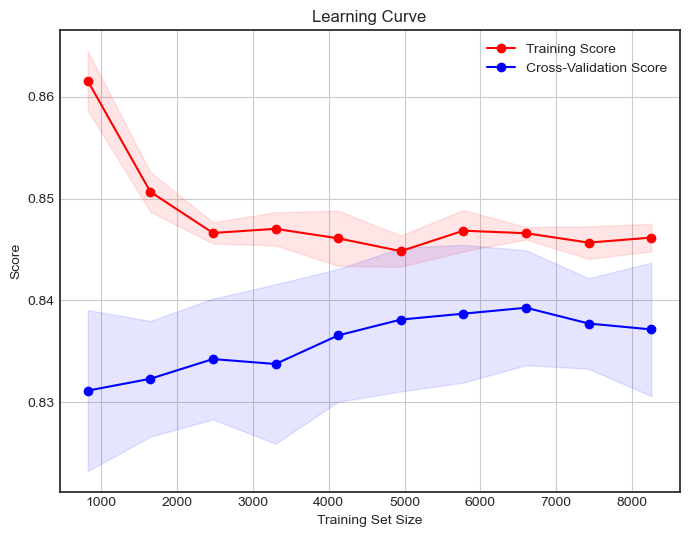

In [258]:
plot_learning_curve(estimator, X_test, y_test, cv=cv, train_sizes=train_sizes)

- Nhìn chung, cả Trainning Score và Cross-Validation Score không quá cao (nằm trong khoảng 0.86 đến 0.83) nhưng cũng không có khác biệt quả lớn nữa hai chỉ số này.
- Mô hình có xu hướng học tốt khi dữ liệu nằm trong khoảng 1000 đến 5000 Trainning Set Size.
- Tuy nhiên, từ điểm 5000 Trainning Set Size trở đi, mô hình bắt đầu không hội tụ, thậm chí có xu hướng tách nhau ở gần điểm 6000 Trainning Set Size. Nhưng sau đấy đã có xu hướng hội tụ hơn.

**ROC Curve**

In [231]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [232]:
y_pred_proba_dtc = best_tree.predict_proba(X_test)[:, 1]

In [234]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_dtc)

In [235]:
roc_auc = auc(fpr, tpr)

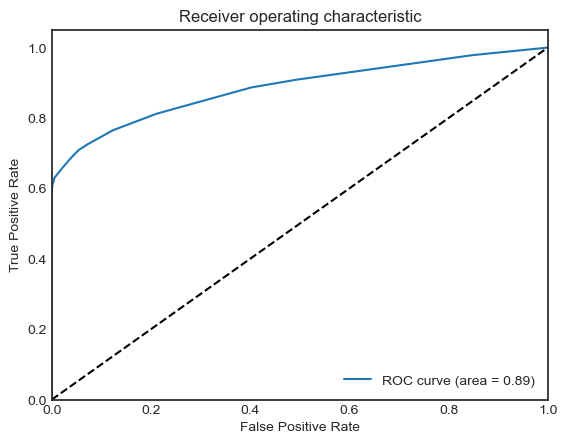

In [236]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ROC AUC của mô hình đạt **89%** (lớn hơn mức thấp nhất cho phép là 50%)

**Precision Recall Curve**

In [238]:
from sklearn.metrics import precision_recall_curve

In [239]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_dtc)

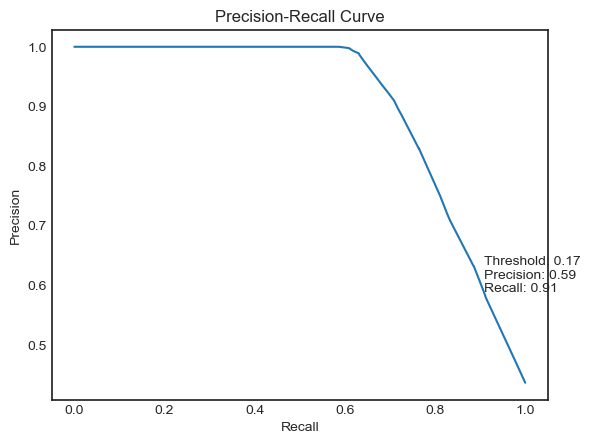

In [245]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
threshold_index = 3
plt.annotate(f'Threshold: {thresholds[threshold_index]:.2f}\nPrecision: {precision[threshold_index]:.2f}\nRecall: {recall[threshold_index]:.2f}', (recall[threshold_index], precision[threshold_index]))
plt.show()

Với **'threshold_index'** bằng 3, nói cách khác, nhóm đang chọn điểm mà Recall đạt 0.91 và Precision đạt 0.59.\
Nhóm chọn điểm Recall đạt cao nhất (vì lựa chọn metric recall để đánh giá mô hình) và precision không dưới 50%.

# **Conclusion**

Tóm lại, bài phân tích sử dụng dữ liệu sử dụng dịch vụ ngân hàng của khách hàng tại một ngân hàng thương mại tại Việt Nam nhằm phân tích dữ liệu và xây dựng mô hình học máy để dự đoán khả năng rời bỏ (không còn sử dụng dịch vụ) của mỗi khách hàng sau 6 tháng sử dụng. 

Bài phân tích xây dựng chỉ số rời bỏ bằng dữ liệu sử dụng dịch vụ của khách hàng vào các giai đoạn (3 tháng trước năm 2021, tháng 3 năm 2021 và tháng 6 năm 2021). Với giả định rằng khách hàng rời bỏ là khách hàng đã từng sử dụng dịch vụ trước đó hoặc khách hàng chưa từng sử dụng dịch vụ nhưng đều không có giao dịch vào tháng 'target', hay tháng 6 năm 2021. Nhóm đã xây dựng được chỉ số rời bỏ hoặc không 'Churn' khá chính xác. 

Sau đó, phân tích dữ liệu cho thấy một số kết quả đáng chú ý, bao gồm:
- Nhóm tuổi ổn định (từ 30 đến 40 tuổi) có số lượng khách hàng rời bỏ ít hơn so với ở Nhóm tuổi chưa ổn định (từ 21 đến 30); 
- Giá trị thanh toán trung bình của cả hai nhóm rời bỏ hay không đều có xu hướng tăng theo thời gian; 
- Giao dịch chuyển khoản là giao dịch được thực hiện nhiều nhất trong tháng 3 và tháng 6 năm 2021; 
- Lượng khách hàng nam lớn hơn gấp hai lần lượng khách hàng nữ; 
- Chủ yếu khách hàng rời bỏ đều trong tình trạng độc thân.

Cuối cùng, xây dựng mô hình, bốn mô hình được lựa chọn, bao gồm: Logistic Regression, SVC, Decision Tree Classifier và Random Forest Classifier. Chỉ số **Recall Score** được lựa chọn để đánh giá và lựa chọn mô hình. Kết quả cho thấy mô hình Decision Tree Classifier có hiệu năng tốt nhất vì có chỉ số Recall Score cao nhất trong bốn mô hình. Sau đó, tìm siêu tham số cho mô hình này cho kết quả Accuracy cao hơn mô hình ban đầu là 0.04%. Tuy nhiên, Recall Score tốt nhất đạt được lên tới 91%, với Precision Score đạt 59% khi lưa chọn Threshold Index là 3.